In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import os
from __future__ import print_function, division

In [2]:
import utils; reload(utils);
from utils import *

Using Theano backend.


In [3]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation
from keras.layers import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.constraints import maxnorm
from keras.utils import np_utils

In [4]:
img_rows, img_cols = 32, 32
img_channels = 3
nb_epochs = 12
nb_filters = 32
batch_size= 128
nb_classes = 10
input_shape = (img_channels, img_rows, img_cols)
kernel_size = (3,3)
pool_size = (2,2)

In [9]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [10]:
X_train.shape[1:]

(3, 32, 32)

In [7]:
X_test = np.expand_dims(X_test,1)
X_train = np.expand_dims(X_train,1)

In [20]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

In [21]:
X_train.shape

(50000, 3, 32, 32)

In [22]:
def norm_input(x): return (x-mean_px)/std_px

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/ 255
X_test = X_test / 255

In [13]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [14]:
y_train.shape

(50000, 10)

In [15]:
X_train.shape

(50000, 3, 32, 32)

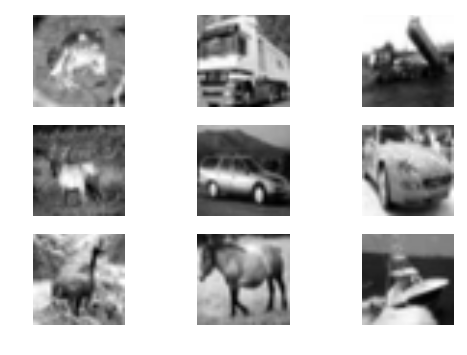

In [16]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i, 0], cmap='gray')
    plt.axis("off")

In [53]:
model = Sequential()
model.add(Convolution2D(32, kernel_size[0], kernel_size[1], border_mode='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Convolution2D(64, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))
model.add(Convolution2D(128, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [55]:
model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [56]:
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch = 12, validation_data = (X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 427s - loss: 1.8490 - acc: 0.3027 - val_loss: 1.4041 - val_acc: 0.4979

In [57]:
score = model.evaluate(X_test, y_test)
print("Score:", score[0])
print("accuracy:", score[1])

10000/10000 [==============================] - 38s        64/10000 [..............................] - ETA: 43s

In [12]:
print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
# Compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(X_train)

Using real-time data augmentation.


In [14]:
model = Sequential()
model.add(Convolution2D(32, kernel_size[0], kernel_size[1], border_mode='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(64, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(Convolution2D(64, kernel_size[0], kernel_size[1]))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))
model.add(Convolution2D(128, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [16]:
model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [17]:
model.optimizer.lr = 0.001

In [26]:
# Fit the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(X_train, y_train,
                                 batch_size=batch_size),
                                 samples_per_epoch=X_train.shape[0],
                                 nb_epoch=nb_epochs,
                                 validation_data=(X_test, y_test))

Epoch 1/12
50000/50000 [==============================] - 615s - loss: 1.8650 - acc: 0.3012 - val_loss: 1.3918 - val_acc: 0.4864

In [27]:
score = model.evaluate(X_test, y_test)
print("Score:", score[0])
print("accuracy:", score[1])

10000/10000 [==============================] - 43s        64/10000 [..............................] - ETA: 45s

In [22]:
ypred = model.predict_classes(X_test)
ypred[:10]

10000/10000 [==============================] - 32s        64/10000 [..............................] - ETA: 35s  544/1000

array([3, 8, 8, 0, 6, 6, 5, 6, 3, 1])

Data Augmentation:

In [23]:
gen = image.ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                              height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=64)
test_batches = gen.flow(X_test, y_test, batch_size=64)

In [37]:
model.fit_generator(batches, batches.N, nb_epoch=2, validation_data = test_batches, nb_val_samples=test_batches.N)

Epoch 1/2


Exception in thread Thread-7:
Traceback (most recent call last):
  File "/Users/trinakarmakar/anaconda2/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/Users/trinakarmakar/anaconda2/lib/python2.7/threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "/Users/trinakarmakar/anaconda2/lib/python2.7/site-packages/keras/engine/training.py", line 404, in data_generator_task
    generator_output = next(generator)
  File "/Users/trinakarmakar/anaconda2/lib/python2.7/site-packages/keras/preprocessing/image.py", line 496, in next
    x = self.image_data_generator.random_transform(x.astype('float32'))
  File "/Users/trinakarmakar/anaconda2/lib/python2.7/site-packages/keras/preprocessing/image.py", line 362, in random_transform
    fill_mode=self.fill_mode, cval=self.cval)
  File "/Users/trinakarmakar/anaconda2/lib/python2.7/site-packages/keras/preprocessing/image.py", line 108, in apply_transform
    final_offset, order=0, mode=

Exception: output of generator should be a tuple (x, y, sample_weight) or (x, y). Found: None

BATCHNORM + DATA AUGMENTATION

In [18]:
def get_model_bn():
    model = Sequential([
        Lambda(norm_input, input_shape=(3,32,32)),
        Convolution2D(32,3,3, activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,3,3, activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,3,3, activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,3,3, activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [19]:
model = get_model_bn()

NameError: global name 'norm_input' is not defined

In [30]:
model.fit_generator(batches, batches.N, nb_epoch=2, validation_data = test_batches, nb_val_samples = test_batches.N)

Epoch 1/2
50000/50000 [==============================] - 537s - loss: 1.4032 - acc: 0.5102 - val_loss: 1.1467 - val_acc: 0.5935

In [31]:
model.optimizer.lr = 0.001

In [32]:
model.fit_generator(batches, batches.N, nb_epoch=5, validation_data = test_batches, nb_val_samples = test_batches.N)

Epoch 1/5
50000/50000 [==============================] - 391s - loss: 0.8883 - acc: 0.6879 - val_loss: 0.8826 - val_acc: 0.6860

BATCHNORM+DATA AUGMENT+DROPOUT

In [55]:
def get_model_bn_do():
    model = Sequential([
        Lambda(norm_input, input_shape=(3, 32, 32)),
        Convolution2D(32,3,3, activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,3,3, activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,3,3, activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,3,3, activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [56]:
model = get_model_bn_do()

In [57]:
model.optimizer.lr = 0.001

In [ ]:
model.fit_generator(batches, batches.N, nb_epoch=10, validation_data = test_batches, nb_val_samples = test_batches.N)

Epoch 1/10
50000/50000 [==============================] - 416s - loss: 1.0332 - acc: 0.6343 - val_loss: 14.5030 - val_acc: 0.1002

In [24]:
def get_model_bn_do():
    model = Sequential([
        Lambda(norm_input, input_shape=(3, 32, 32)),
        Convolution2D(32,3,3, activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,3,3, activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(128,3,3, activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(256,3,3, activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(1024, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [25]:
model = get_model_bn_do()

In [26]:
model.optimizer.lr = 0.001

In [ ]:
model.fit_generator(batches, batches.N, nb_epoch=10, validation_data = test_batches, nb_val_samples = test_batches.N)

Epoch 1/10
50000/50000 [==============================] - 3384s - loss: 1.8445 - acc: 0.3582 - val_loss: 1.3116 - val_acc: 0.5248